# Project : A PUBLIC DOMAIN DATASET FOR REAL-LIFE HUMAN ACTIVITY RECOGNITION USING SMARTPHONE SENSORS
## First Step:
Start with the data exploration and visualization to understand the data and the problem better 
> 1 - Importing the libraries

> 2 - Importing the dataset

> 3 - Drop the unnecessary columns

> 4 - Analyze the data

> 5 - Visualize the data


Missing values in the dataset:  0
Number of features:  92
Number of samples:  499276
Labels:  ['Walking' 'Inactive' 'Active' 'Driving']


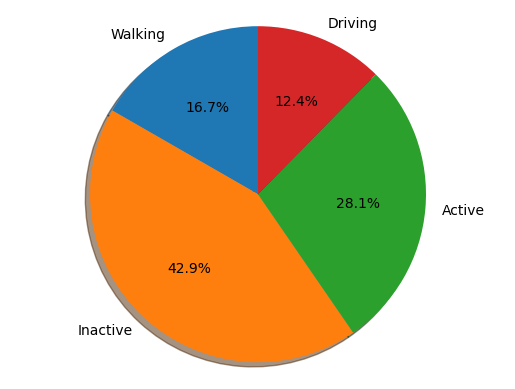

In [2]:
# Project : A PUBLIC DOMAIN DATASET FOR REAL-LIFE HUMAN ACTIVITY RECOGNITION USING SMARTPHONE SENSORS
# First Step: Start with the data exploration and visualization to understand the data and the problem better 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
data = pd.read_csv('sensoringData_feature_prepared_20_19.0_2.csv',header = 0)


# Remove id, user and timestamp because they are useless for the prediction
data = data.drop(['id', 'user', 'timestamp'], axis=1)


# Number of Missing Values
print ("Missing values in the dataset: ", data.isnull().sum().sum())

# Number of features
print ("Number of features: ", len(data.columns))

# Number of samples
print ("Number of samples: ", len(data))

# Show labels
print ("Labels: ", data['activity'].unique())

# Plot on Pie Chart the number of samples for each activity
labels = data['activity'].unique()
sizes = [np.sum(data['activity'] == label) for label in labels]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Second Step:
Prepare the data for the machine learning model

> 1 - Get the 10 best features using the SelectKBest class from sklearn library and the f_classif function

> 2 - Analyze the data to get the number of examples of best features

> 3 - Split the data into training, testing and validation sets

> 4 - Analyze the data to get the number of examples of training, testing and validation sets and for each class


In [3]:
# Get best features
from sklearn.feature_selection import SelectKBest, f_classif

X=data.values[:,0:-2] # extract all features except the last two because they are activity id and activity name
y=data.values[:,-1] # extract the last column as the label because it is the activity


# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
X_best = fit.transform(X) # transform the data to the best features

# Show the best features
print("Best Features: ", len(X_best[0]))
print("Examples of best features: ", len(X_best))


Best Features:  10
Examples of best features:  499276


In [4]:
#Train Test Split
# Split the data into training(60%), testing(20%) and validation sets(20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.6, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

# Show the number of samples in each set
print("Number of samples in training set: ", len(X_train))
print("Number of samples in testing set: ", len(X_test))
print("Number of samples in validation set: ", len(X_val))

# Show the number of samples for each activity in each set
print("Number of samples for each activity in training set:\n", np.unique(y_train, return_counts=True))
print("Number of samples for each activity in testing set:\n", np.unique(y_test, return_counts=True))
print("Number of samples for each activity in validation set:\n", np.unique(y_val, return_counts=True))


Number of samples in training set:  199710
Number of samples in testing set:  149783
Number of samples in validation set:  149783
Number of samples for each activity in training set:  (array(['Active', 'Driving', 'Inactive', 'Walking'], dtype=object), array([55851, 24846, 85512, 33501], dtype=int64))
Number of samples for each activity in testing set:  (array(['Active', 'Driving', 'Inactive', 'Walking'], dtype=object), array([41910, 18461, 64422, 24990], dtype=int64))
Number of samples for each activity in validation set:  (array(['Active', 'Driving', 'Inactive', 'Walking'], dtype=object), array([42299, 18403, 64196, 24885], dtype=int64))


## Third Step:
Use Perceptron model to classify the data and get the accuracy score and the confusion matrix

> 1 - Use Perceptron model to classify the data

> 2 - Get the accuracy score and the confusion matrix


In [5]:
#Learning
from sklearn.linear_model import Perceptron
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None,
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)

ppn.fit(X_train,y_train)


Perceptron(eta0=0.1, max_iter=20, n_jobs=1, tol=None)

Misclassified samples: 38172
Accuracy: 0.75
[[14098  1186 13744 12882]
 [  338 16006   399  1718]
 [  510  1808 61780   324]
 [ 1016   916  3331 19727]]


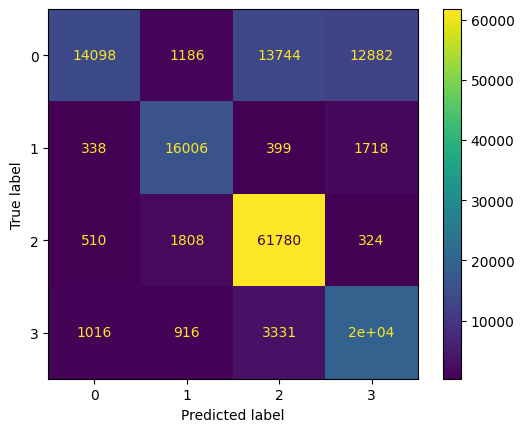

              precision    recall  f1-score   support

      Active       0.88      0.34      0.49     41910
     Driving       0.80      0.87      0.83     18461
    Inactive       0.78      0.96      0.86     64422
     Walking       0.57      0.79      0.66     24990

    accuracy                           0.75    149783
   macro avg       0.76      0.74      0.71    149783
weighted avg       0.78      0.75      0.72    149783



In [6]:
#Testing
y_pred = ppn.predict(X_test)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % ppn.score(X_test, y_test))



#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = ppn.predict(X_test)
cf_M = confusion_matrix(y_test, y_pred)
print(cf_M)
disp = ConfusionMatrixDisplay(confusion_matrix=cf_M)
disp.plot()
plt.show()

#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



## Fourth Step:
Determine the models to be used and the hyperparameters to be tested
The models to be used are Linear SVM, RBF SVM, Decision Tree and Random Forest, we choose these models because the linear and rbf SVMs were used in the paper and the decision tree and random forest were used to explore and compare the results between the models.
To get the best hyperparameters combination we used a set of candidate values for each hyperparameter.
These values are chosen based on the paper and some notebooks realized on the classes of the course.


> 1 - Create a function for each model 

> 2 - For each model determine the candidate values for the hyperparameters

> 3 - Train the models using the training set and the validation set for each combination of hyperparameters

> 4 - Get the best hyperparameters combination for each model based on the f1 score 




In [7]:
#Models Evaluation

# Import the five supervised learning models from sklearn
# Import f1_score to compare the models
from sklearn.metrics import f1_score
#linear svm
from sklearn import svm, linear_model
#rbf svm
from sklearn.svm import SVC
#knn
from sklearn.neighbors import KNeighborsClassifier
#decision tree
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier

# Function of linear svm
def linear_svm(c):
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    f1= f1_score(y_val, y_pred, average='micro')
    return f1

# Function of rbf svm
def rbf_svm(c):
    clf = SVC(kernel='rbf', C=c)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    f1= f1_score(y_val, y_pred, average='micro')
    return f1


# Function of decision tree
def decision_tree(max_depth, criterion):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    f1= f1_score(y_val, y_pred, average='micro')
    return f1

# Function of random forest
def random_forest(n_estimators, max_depth):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    f1= f1_score(y_val, y_pred, average='micro')
    return f1



In [7]:
# Linear SVM
# Discover the best candidate hyperparameters
results = {}
hp_candidates = [0.1,0.5, 1]
best_f1 = 0
best_hp = 0
for hp in hp_candidates:
    f1 = linear_svm(hp)
    results[hp] = f1
    print("F1 score: ", f1, " with hyperparameter: ", hp)
    if f1 > best_f1:
        best_f1 = f1
        best_hp = hp
print("Best hyperparameter: ", best_hp)
print("F1 score: ", best_f1)



F1 score:  0.8483205704252152  with hyperparameter:  0.1
F1 score:  0.8525934184787327  with hyperparameter:  0.5
F1 score:  0.8540622099971292  with hyperparameter:  1
Best hyperparameter:  1
F1 score:  0.8540622099971292


In [8]:

# RBF SVM
# Discover the best candidate hyperparameters
results = {}
hp_candidates = [0.1,0.5, 1]
best_f1 = 0
best_hp = 0
for hp in hp_candidates:
    f1 = rbf_svm(hp)
    results[hp] = f1
    print("F1 score: ", f1, " with hyperparameter: ", hp)
    if f1 > best_f1:
        best_f1 = f1
        best_hp = hp
print("Best hyperparameter: ", best_hp)
print("F1 score: ", best_f1)


F1 score:  0.8338329449937577  with hyperparameter:  0.1
F1 score:  0.8512047428613395  with hyperparameter:  0.5
F1 score:  0.8567394163556611  with hyperparameter:  1
Best hyperparameter:  1
F1 score:  0.8567394163556611


In [ ]:
# Decision Tree
# Discover the best candidate hyperparameters
results = {}
hp_candidates = {"max_depth": [4,8,16,20], "criterion": ["gini", "entropy"]}
best_f1 = 0
best_hp = 0
for criterion in hp_candidates["criterion"]:
    for max_depth in hp_candidates["max_depth"]:
        f1 = decision_tree(max_depth, criterion)
        results[(max_depth, criterion)] = f1
        print("F1 score: ", f1, " with hyperparameter: ", (max_depth, criterion))
        if f1 > best_f1:
            best_f1 = f1
            best_hp = (max_depth, criterion)
print("Best hyperparameter: ", best_hp)
print("F1 score: ", best_f1)


F1 score:  0.9055032947664288  with hyperparameter:  (4, 'gini')
F1 score:  0.9277755152453884  with hyperparameter:  (8, 'gini')
F1 score:  0.9478979590474219  with hyperparameter:  (16, 'gini')
F1 score:  0.952124072825354  with hyperparameter:  (20, 'gini')
F1 score:  0.9044417590781331  with hyperparameter:  (4, 'entropy')
F1 score:  0.9260196417483961  with hyperparameter:  (8, 'entropy')
F1 score:  0.9497673300708358  with hyperparameter:  (16, 'entropy')
F1 score:  0.9542404678768619  with hyperparameter:  (20, 'entropy')
Best hyperparameter:  (20, 'entropy')
F1 score:  0.9542404678768619


In [ ]:
# Random Forest
# Discover the best candidate hyperparameters
results = {}
hp_candidates = {"n_estimators": [50,100,200], "max_depth": [40,60,80]}
best_f1 = 0
best_hp = 0
for n_estimators in hp_candidates["n_estimators"]:
    for max_depth in hp_candidates["max_depth"]:
        f1 = random_forest(n_estimators, max_depth)
        results[(n_estimators, max_depth)] = f1
        print("F1 score: ", f1, " with hyperparameter: ", (n_estimators, max_depth))
        if f1 > best_f1:
            best_f1 = f1
            best_hp = (n_estimators, max_depth)
print("Best hyperparameter: ", best_hp)
print("F1 score: ", best_f1)




F1 score:  0.9688215618594901  with hyperparameter:  (50, 40)
F1 score:  0.9687815039089883  with hyperparameter:  (50, 60)
F1 score:  0.9687214169832358  with hyperparameter:  (50, 80)
F1 score:  0.9692889046153436  with hyperparameter:  (100, 40)
F1 score:  0.969068585887584  with hyperparameter:  (100, 60)
F1 score:  0.9690819385377513  with hyperparameter:  (100, 80)
F1 score:  0.9693890494915979  with hyperparameter:  (200, 40)
F1 score:  0.9695025470180194  with hyperparameter:  (200, 60)
F1 score:  0.9694558127424341  with hyperparameter:  (200, 80)
Best hyperparameter:  (200, 60)
F1 score:  0.9695025470180194


## Fifth Step:
Evaluate the models using the best hyperparameters combination 

> 1 - Get the best hyperparameters combination for each model

> 2 - Train the models using the training set 

> 3 - Evaluate the models using the testing set and predicted values from Perceptron model

> 4 - Get the F1 score and the confusion matrix for each model





In [7]:
# Final Models Evaluation/Comparison
# Create the models with the best hyperparameters
results={0:[],1:[],2:[],3:[]}


Linear SVM Model
F1 score:  [0.77854279 0.89596219 0.89226055 0.8356257 ]
[[30870   159 10218   663]
 [ 2246 15355   708   152]
 [ 1067   151 63189    15]
 [ 3209   150  3101 18530]]


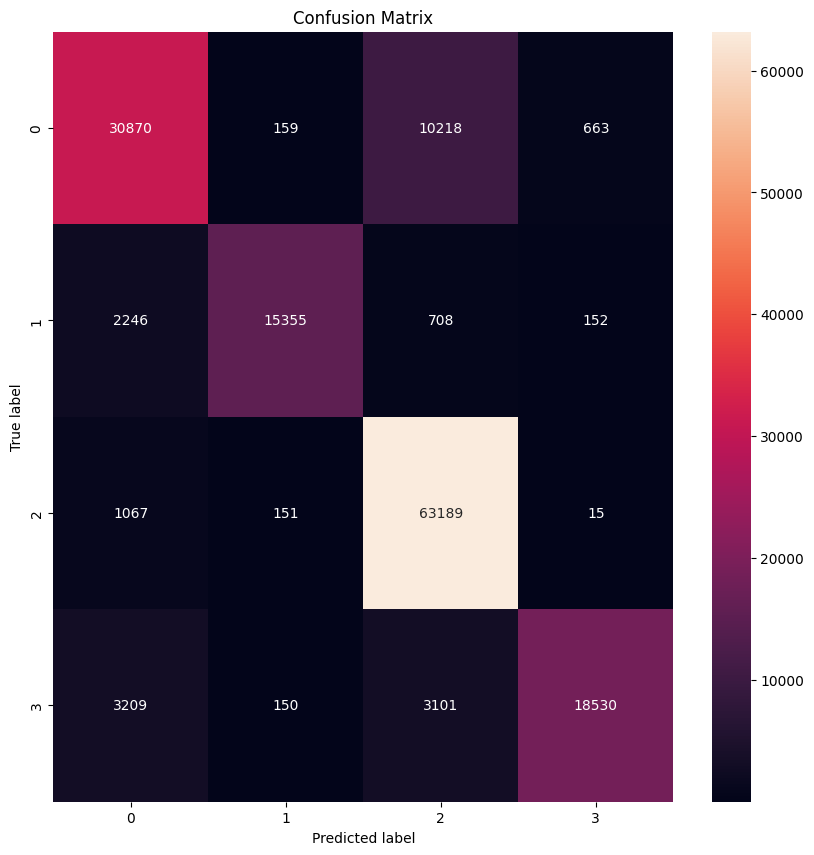

In [8]:
# Linear SVM
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
print("Linear SVM Model")
y_pred = clf.predict(X_test)
f1_linear_svm = f1_score(y_test, y_pred, average=None)
f1_linear_svm_micro = f1_score(y_test, y_pred, average='micro')
print("F1 score: ", f1_linear_svm)
for i in range(len(results)):
    results[i].append(f1_linear_svm[i])
    

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_M = confusion_matrix(y_test, y_pred)
print(cf_M)

# Display the confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cf_M, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

RBF SVM Model
F1 score:  [0.78622672 0.90177199 0.89090999 0.84459505]
[[31179   130 10146   455]
 [ 2075 15547   712   127]
 [ 1098   289 63035     0]
 [ 3051    54  3192 18693]]


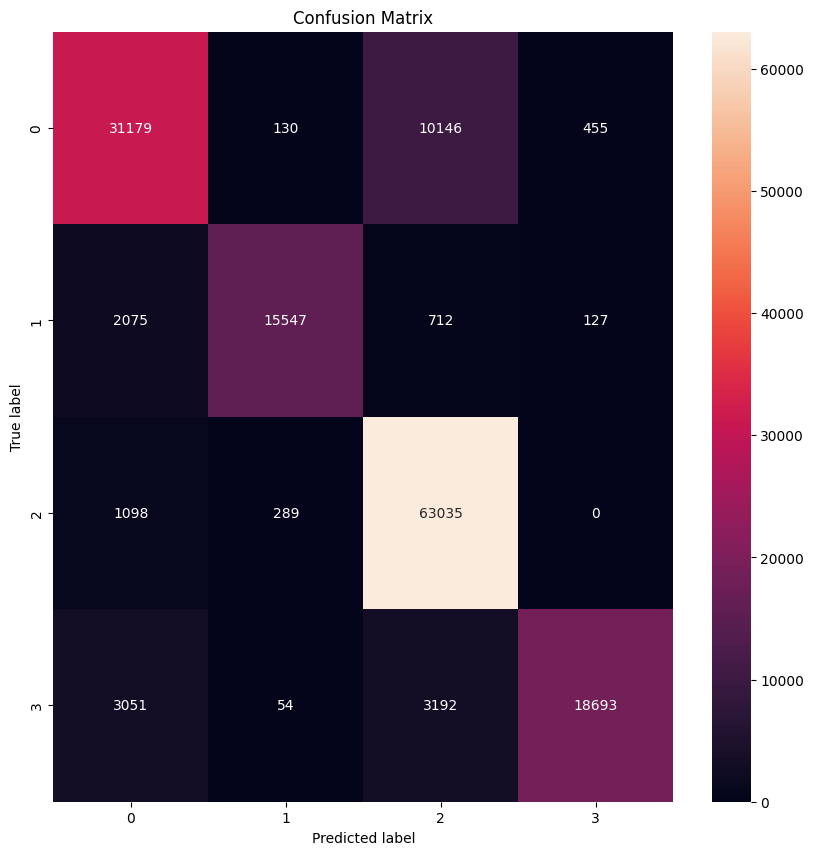

In [9]:
# RBF SVM
clf = SVC(kernel='rbf', C=1)
clf.fit(X_train, y_train)
print("RBF SVM Model")
y_pred = clf.predict(X_test)
f1_rbf_svm = f1_score(y_test, y_pred, average=None)
f1_rbf_svm_micro = f1_score(y_test, y_pred, average='micro')
print("F1 score: ", f1_rbf_svm)
for i in range(len(results)):
    results[i].append(f1_rbf_svm[i])

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_M = confusion_matrix(y_test, y_pred)
print(cf_M)

# Display the confusion matrix

plt.figure(figsize=(10,10))
sns.heatmap(cf_M, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Decision Tree Model
F1 score:  [0.93664634 0.96014859 0.98208192 0.90729032]
[[40014   379   382  1135]
 [  724 17576    54   107]
 [  725    59 63168   470]
 [ 2068   136   615 22171]]


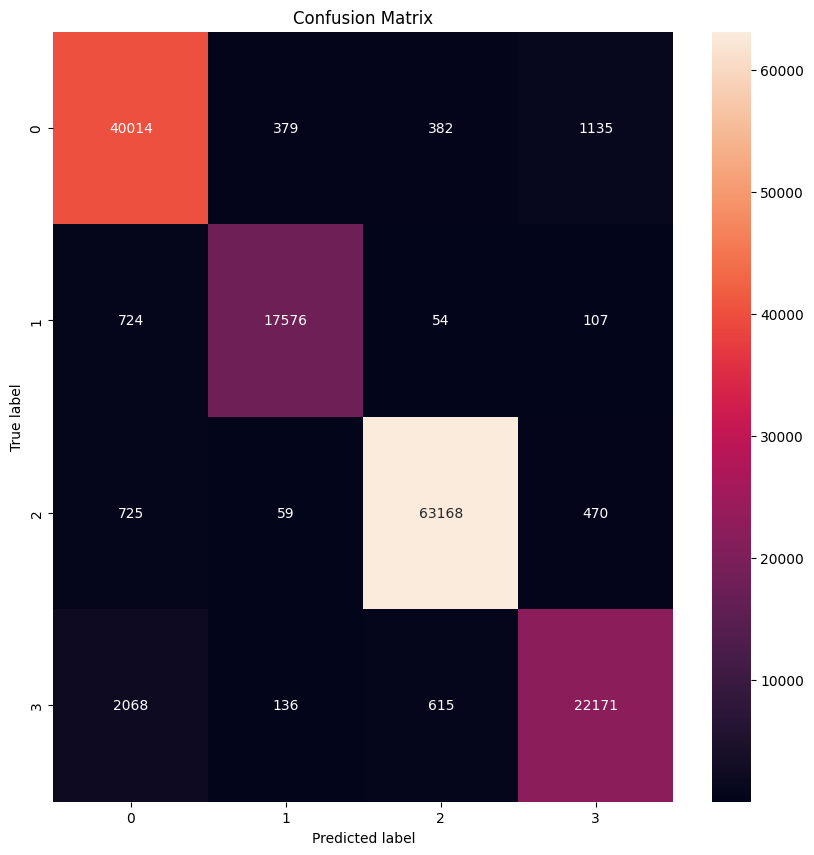

In [10]:
# Decision Tree
clf = DecisionTreeClassifier(max_depth=20, criterion='entropy')
clf.fit(X_train, y_train)
print("Decision Tree Model")
y_pred = clf.predict(X_test)
f1_decision_tree = f1_score(y_test, y_pred, average=None)
f1_decision_tree_micro = f1_score(y_test, y_pred, average='micro')
print("F1 score: ", f1_decision_tree)
for i in range(len(results)):
    results[i].append(f1_decision_tree[i])

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_M = confusion_matrix(y_test, y_pred)
print(cf_M)

# Display the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cf_M, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Random Forest Model
F1 score:  [0.95816345 0.97527805 0.98745834 0.93677969]
[[41362    82   120   346]
 [  633 17713    41    74]
 [  662    12 63696    52]
 [ 1769    56   731 22434]]


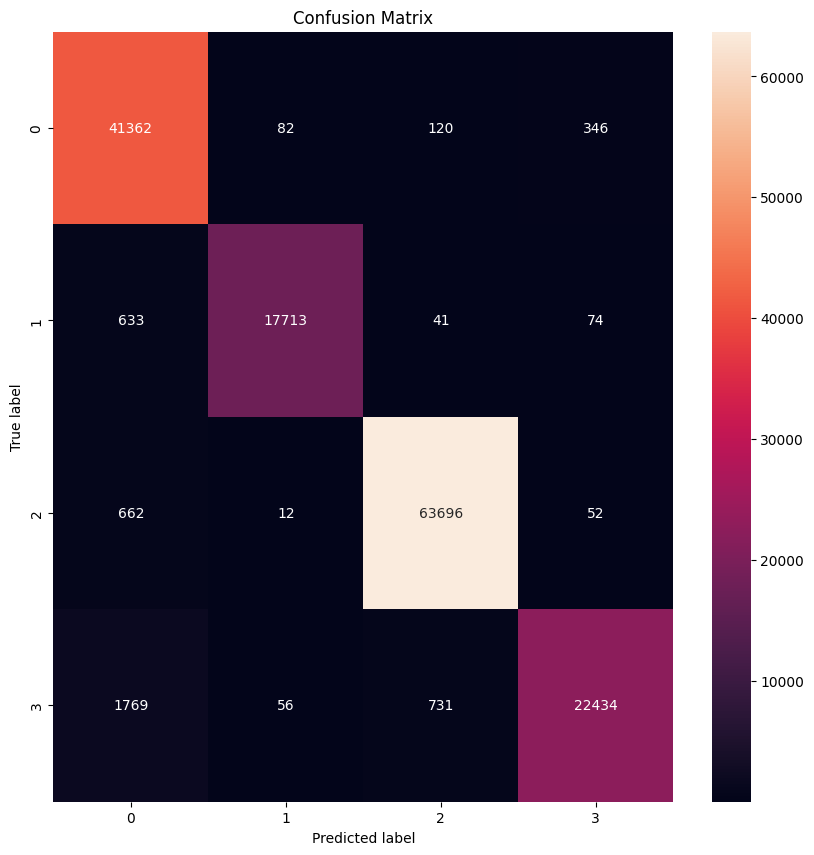

In [11]:
# Random Forest
clf = RandomForestClassifier(n_estimators=200, max_depth=80)
clf.fit(X_train, y_train)
print("Random Forest Model")
y_pred = clf.predict(X_test)
f1_random_forest = f1_score(y_test, y_pred, average=None)
f1_random_forest_micro = f1_score(y_test, y_pred, average='micro')
print("F1 score: ", f1_random_forest)
for i in range(len(results)):
    results[i].append(f1_random_forest[i])

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cf_M = confusion_matrix(y_test, y_pred)
print(cf_M)

# Display the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cf_M, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Sixth Step:
Compare the models based on the f1 score

> 1 - Use the previous values and display the results in a table

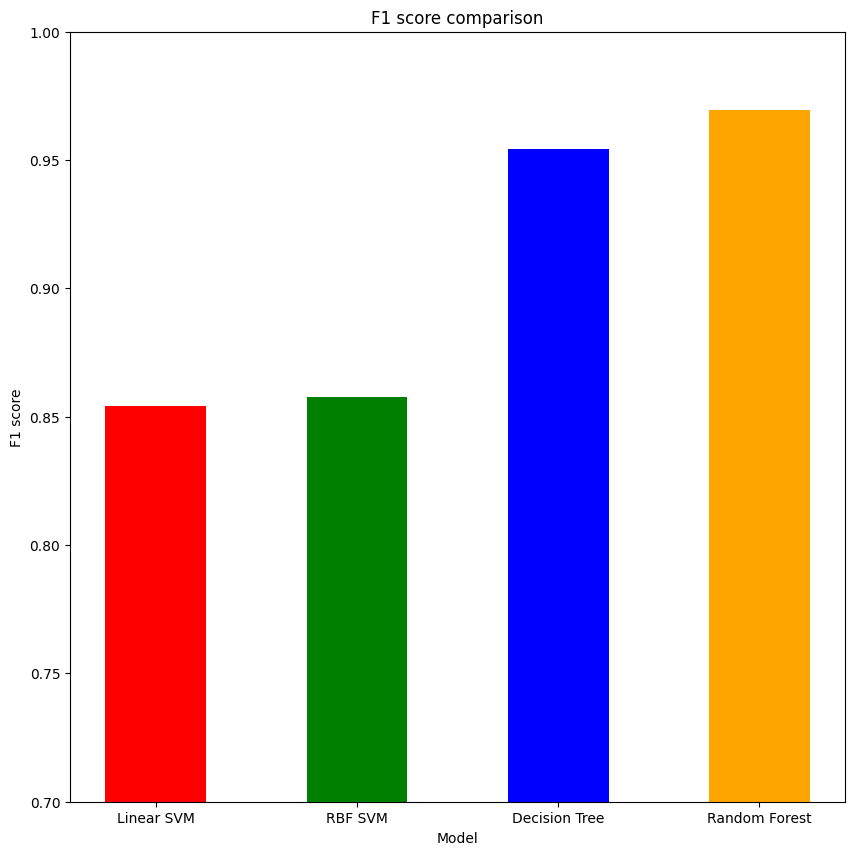

In [12]:
# Compare the models on a bar chart
plt.figure(figsize=(10,10))
f1_values= [f1_linear_svm_micro, f1_rbf_svm_micro, f1_decision_tree_micro, f1_random_forest_micro]
models= ["Linear SVM", "RBF SVM", "Decision Tree", "Random Forest"]
plt.bar(models, f1_values, color=['red', 'green', 'blue', 'orange'], width=0.5)
plt.title("F1 score comparison")
plt.ylabel('F1 score')
plt.xlabel('Model')
plt.title("F1 score comparison")
plt.ylim(0.7,1)
plt.show()


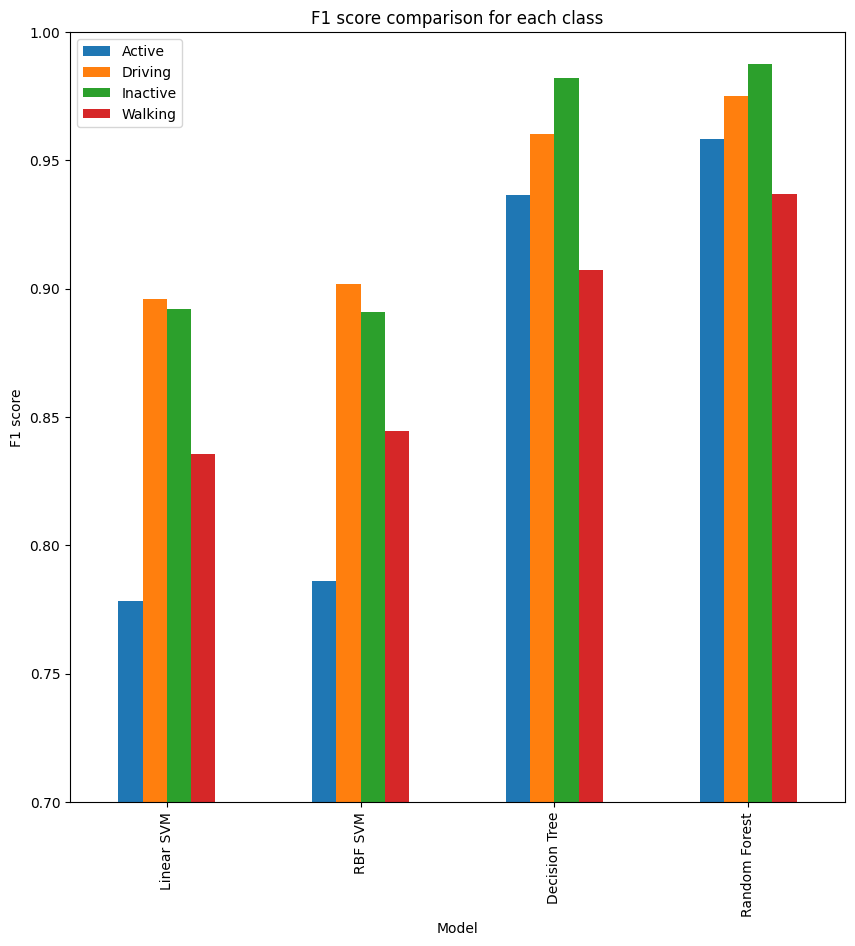

In [14]:
#Compare the models on a bar chart for each class

plot= pd.DataFrame({
    'Active': results[0],
    'Driving': results[1],
    'Inactive': results[2],
    'Walking': results[3]
},

index=['Linear SVM', 'RBF SVM', 'Decision Tree', 'Random Forest'])

plot.plot(kind='bar', figsize=(10,10))
plt.title("F1 score comparison for each class")
plt.ylabel('F1 score')
plt.xlabel('Model')
plt.title("F1 score comparison for each class")
plt.ylim(0.7,1)
plt.show()

